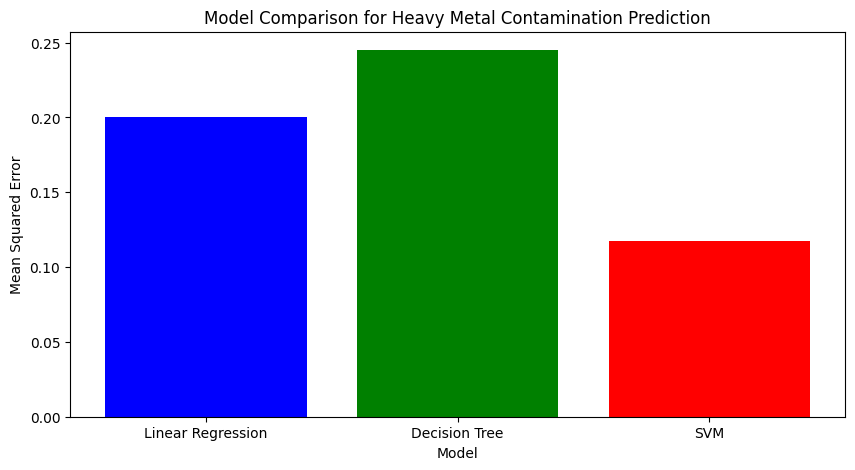

The best model is SVM with MSE: 0.1174


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv('soil.csv')

# Handle missing values (fill with mean for numerical columns)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Convert categorical column 'Soil_Type' to numerical using one-hot encoding
if 'Soil_Type' in df.columns:
    df = pd.get_dummies(df, columns=['Soil_Type'], drop_first=True)

# Encode categorical target variable if needed
if df['Contamination_Level'].dtype == 'object':
    label_encoder = LabelEncoder()
    df['Contamination_Level'] = label_encoder.fit_transform(df['Contamination_Level'])

# Features and target variable
X = df.drop(columns=['Contamination_Level'])  # Drop target variable from features
y = df['Contamination_Level']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
lr = LinearRegression()
dt = DecisionTreeRegressor()
svm = SVR()

# Train models
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
svm.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_svm = svm.predict(X_test_scaled)

# Calculate Mean Squared Error
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_svm = mean_squared_error(y_test, y_pred_svm)

# Plot MSE comparison
plt.figure(figsize=(10, 5))
plt.bar(['Linear Regression', 'Decision Tree', 'SVM'], [mse_lr, mse_dt, mse_svm], color=['blue', 'green', 'red'])
plt.xlabel("Model")
plt.ylabel("Mean Squared Error")
plt.title("Model Comparison for Heavy Metal Contamination Prediction")
plt.show()

# Determine the best model
best_model = min(zip(['Linear Regression', 'Decision Tree', 'SVM'], [mse_lr, mse_dt, mse_svm]), key=lambda x: x[1])
print(f"The best model is {best_model[0]} with MSE: {best_model[1]:.4f}")
